<a href="https://colab.research.google.com/github/CeeTerer/Dr_Semmelweis_Handwashing_Discovery/blob/main/Dr_Semmelweis_Handwashing_Discovery_(start).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### The Data Source

Dr Semmelweis published his research in 1861. I found the scanned pages of the [full text with the original tables in German](http://www.deutschestextarchiv.de/book/show/semmelweis_kindbettfieber_1861), but an excellent [English translation can be found here](http://graphics8.nytimes.com/images/blogs/freakonomics/pdf/the%20etiology,%20concept%20and%20prophylaxis%20of%20childbed%20fever.pdf).



In [ ]:
 % pip install --upgrade plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
 import pandas as pd
 import numpy as np
 import plotly.express as px
 import seaborn as sns
 import matplotlib.pyplot as plt
 import matplotlib.dates as mdates
import scipy.stats as stats

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format

# Create locators for ticks on the time axis


from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [ ]:
df_yearly = pd.read_csv('annual_deaths_by_clinic.csv')
# parse_dates avoids DateTime conversion later
df_monthly = pd.read_csv('monthly_deaths.csv', 
                      parse_dates=['date'])

In [ ]:
df_monthly.shape

(98, 3)

In [ ]:
df_yearly.shape

(12, 4)

In [ ]:
df_yearly.columns

Index(['year', 'births', 'deaths', 'clinic'], dtype='object')

In [ ]:
df_monthly.columns

Index(['date', 'births', 'deaths'], dtype='object')

In [ ]:
df_monthly.isna().values.any()

False

In [ ]:
df_yearly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   year    12 non-null     int64 
 1   births  12 non-null     int64 
 2   deaths  12 non-null     int64 
 3   clinic  12 non-null     object
dtypes: int64(3), object(1)
memory usage: 512.0+ bytes


In [ ]:
df_monthly.duplicated().values.any()

False

In [ ]:
df_yearly.duplicated().values.any()

False

In [ ]:
df_yearly.describe()

,year,births,deaths
count,12.00,12.00,12.00
mean,"1,843.50","3,152.75",223.33
std,1.78,449.08,145.38
min,"1,841.00","2,442.00",66.00
25%,"1,842.00","2,901.75",100.25
50%,"1,843.50","3,108.50",219.50
75%,"1,845.00","3,338.25",263.50
max,"1,846.00","4,010.00",518.00


In [ ]:
df_monthly.describe()

,births,deaths
count,98.00,98.00
mean,267.00,22.47
std,41.77,18.14
min,190.00,0.00
25%,242.50,8.00
50%,264.00,16.50
75%,292.75,36.75
max,406.00,75.00


### Percentage of Women Dying in Childbirth

 How dangerous was childbirth in the 1840s in Vienna? 

* Using the annual data, calculate the percentage of women giving birth who died throughout the 1840s at the hospital.



In [ ]:
prob = df_yearly.deaths.sum() / df_yearly.births.sum() * 100
print(f'Chances of dying in the 1840s in Vienna: {prob:.3}%')

Chances of dying in the 1840s in Vienna: 7.08%


# Visualise the Total Number of Births and Deaths over Time

### Plot the Monthly Data on Twin Axes

Create a [Matplotlib chart](https://matplotlib.org/3.3.2/api/_as_gen/matplotlib.pyplot.plot.html) with twin y-axes.


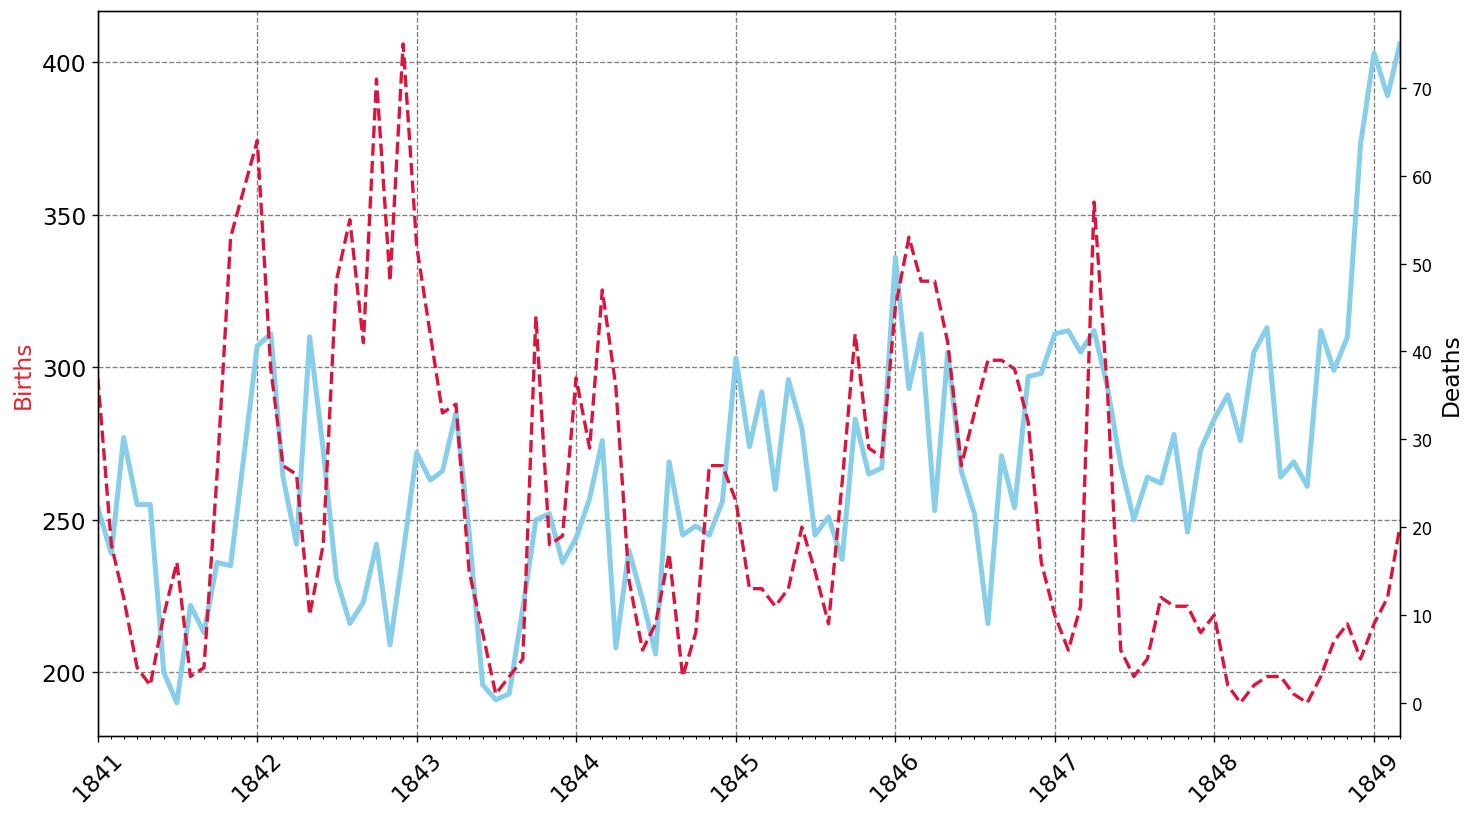

In [ ]:
plt.figure(figsize=(14,8),dpi=120)
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)
years=mdates.YearLocator()
months=mdates.MonthLocator()
yrs_fmt = mdates.DateFormatter('%Y')
ax1 = plt.gca()
ax2= ax1.twinx()
ax1.grid(color='grey', linestyle='--')
ax1.set_xlim([df_monthly.date.min(), df_monthly.date.max()])
ax1.plot(df_monthly.date, 
         df_monthly.births, 
         color='skyblue', 
         linewidth=3)
 
 
ax2.plot(df_monthly.date, 
         df_monthly.deaths, 
         color='crimson', 
         linewidth=2, 
         linestyle='--')

ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(yrs_fmt)
ax1.xaxis.set_minor_locator(months)
ax1.set_ylabel('Births', color='#E6232E', fontsize=14)
ax2.set_ylabel('Deaths', fontsize=14)
plt.show()

# The Yearly Data Split by Clinic



 Use plotly to create line charts of the births and deaths of the two different clinics at the Vienna General Hospital. 


In [ ]:
line = px.line(df_yearly, 
               x='year', 
               y='births',
               color='clinic',
               title='Total Yearly Births by Clinic')
 
line.show()

In [ ]:
line = px.line(df_yearly, 
               x='year', 
               y='deaths',
               color='clinic',
               title='Total Yearly Deaths by Clinic')
 
line.show()

### Calculate the Proportion of Deaths at Each Clinic

 Calculate the proportion of maternal deaths per clinic. That way we can compare like with like. 


In [ ]:
df_yearly['pct_deaths'] = df_yearly.deaths / df_yearly.births

In [ ]:
clinic_1 = df_yearly[df_yearly.clinic == 'clinic 1']
avg_c1 = clinic_1.deaths.sum() / clinic_1.births.sum() * 100
print(f'Average death rate in clinic 1 is {avg_c1:.3}%.')

Average death rate in clinic 1 is 9.92%.


### Plotting the Proportion of Yearly Deaths by Clinic

In [ ]:
pct_line = px.line(df_yearly, x= 'year' , y='pct_deaths', color='clinic', title='Percentage deaths by Clinic')
pct_line.show()

# The Effect of Handwashing

Dr Semmelweis made handwashing obligatory in the summer of 1947. In fact, he ordered people to wash their hands with clorine (instead of water).

In [ ]:
# Date when handwashing was made mandatory
handwashing_start = pd.to_datetime('1847-06-01')


* Add a column called "pct_deaths" to `df_monthly` that has the percentage of deaths per birth for each row. 
* Create two subsets from the `df_monthly` data: before and after Dr Semmelweis ordered washing hand.
* Calculate the average death rate prior to June 1947.
* Calculate the average death rate after June 1947.

In [ ]:
df_monthly['pct_deaths']= df_monthly.deaths / df_monthly.births

In [ ]:
before_handwash = df_monthly[df_monthly['date'] < handwashing_start]
after_handwash = df_monthly[df_monthly['date'] >= handwashing_start]

In [ ]:
before_handwash.pct_deaths.mean()

0.10504998260908789

In [ ]:
after_handwash.pct_deaths.mean()

0.021093375097254535

In [ ]:
bw_rate = before_handwash.deaths.sum() / before_handwash.births.sum() * 100
aw_rate = after_handwash.deaths.sum() / after_handwash.births.sum() * 100
print(f'Average death rate before 1847 was {bw_rate:.4}%')
print(f'Average death rate AFTER 1847 was {aw_rate:.3}%')

Average death rate before 1847 was 10.53%
Average death rate AFTER 1847 was 2.15%


### Calculate a Rolling Average of the Death Rate

 Create a DataFrame that has the 6 month rolling average death rate prior to mandatory handwashing.

set the dates as the index in order to avoid the date column being dropped during the calculation.

In [ ]:
roll_df = before_handwash.set_index('date')
roll_df = roll_df.rolling(window=6).mean()

### Highlighting Subsections of a Line Chart


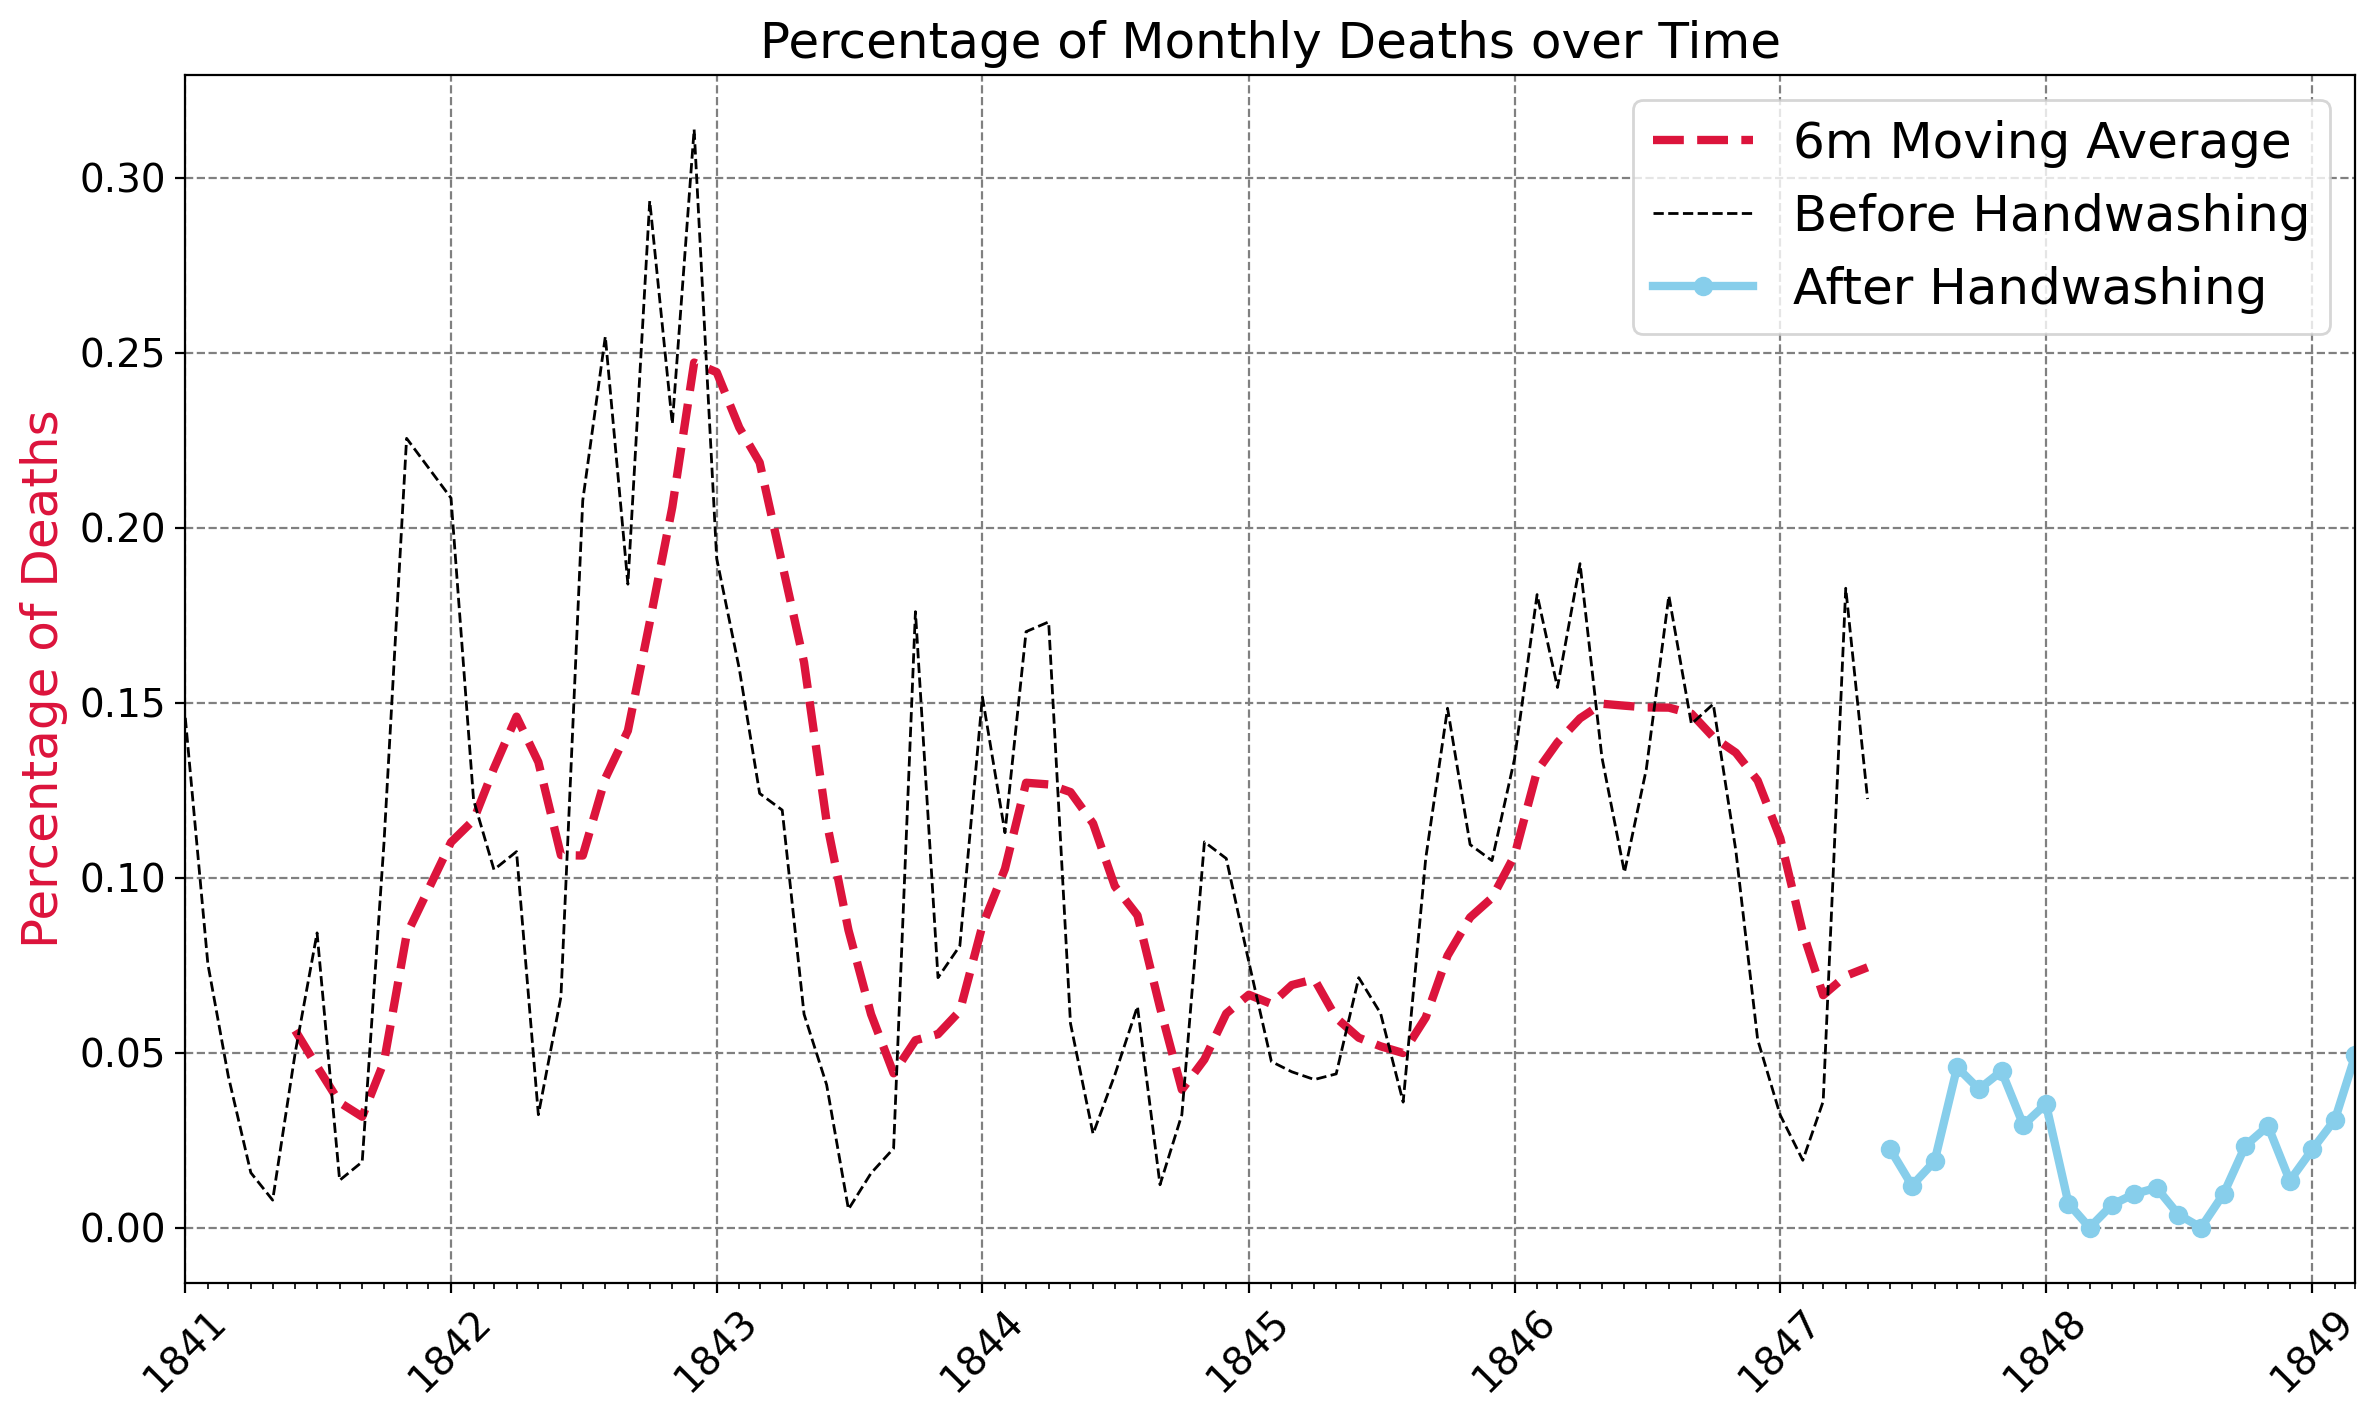

In [ ]:
plt.figure(figsize=(14,8), dpi=200)
plt.title('Percentage of Monthly Deaths over Time', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14, rotation=45)
 
plt.ylabel('Percentage of Deaths', color='crimson', fontsize=18)
 
ax = plt.gca()
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yrs_fmt)
ax.xaxis.set_minor_locator(months)
ax.set_xlim([df_monthly.date.min(), df_monthly.date.max()])
 
plt.grid(color='grey', linestyle='--')
 
ma_line, = plt.plot(roll_df.index, 
                    roll_df.pct_deaths, 
                    color='crimson', 
                    linewidth=3, 
                    linestyle='--',
                    label='6m Moving Average')
bw_line, = plt.plot(before_handwash.date, 
                    before_handwash.pct_deaths,
                    color='black', 
                    linewidth=1, 
                    linestyle='--', 
                    label='Before Handwashing')
aw_line, = plt.plot(after_handwash.date, 
                    after_handwash.pct_deaths, 
                    color='skyblue', 
                    linewidth=3, 
                    marker='o',
                    label='After Handwashing')
 
plt.legend(handles=[ma_line, bw_line, aw_line],
           fontsize=18)
 
plt.show()

### Statistics - Calculate the Difference in the Average Monthly Death Rate


In [ ]:
avg_prob_before=before_handwash.pct_deaths.mean()*100

In [ ]:
avg_prob_after=after_handwash.pct_deaths.mean()*100

In [ ]:
 
mean_diff = avg_prob_before - avg_prob_after
print(f'Handwashing reduced the monthly proportion of deaths by {mean_diff:.3}%!')
 
times = avg_prob_before / avg_prob_after
print(f'This is a {times:.2}x improvement!')


Handwashing reduced the monthly proportion of deaths by 8.4%!
This is a 5.0x improvement!


### Use Box Plots to Show How the Death Rate Changed Before and After Handwashing

* Use [NumPy's `.where()` function](https://numpy.org/doc/stable/reference/generated/numpy.where.html) to add a column to `df_monthly` that shows if a particular date was before or after the start of handwashing. 
* Then use plotly to create box plot of the data before and after handwashing. 
* How did key statistics like the mean, max, min, 1st and 3rd quartile changed as a result of the new policy?



In [ ]:
df_monthly['washing_hands'] = np.where(df_monthly.date < handwashing_start, 'No', 'Yes')

In [ ]:
box = px.box(df_monthly, 
             x='washing_hands', 
             y='pct_deaths',
             color='washing_hands',
             title='How Have the Stats Changed with Handwashing?')
 
box.update_layout(xaxis_title='Washing Hands?',
                  yaxis_title='Percentage of Monthly Deaths',)
 
box.show()

### Use Histograms to Visualise the Monthly Distribution of Outcomes

Create a [plotly histogram](https://plotly.com/python/histograms/) to show the monthly percentage of deaths. 


In [ ]:
hist = px.histogram(df_monthly, 
                   x='pct_deaths', 
                   color='washing_hands',
                   nbins=30,
                   opacity=0.6,
                   barmode='overlay',
                   histnorm='percent',
                   marginal='box',)
 
hist.update_layout(xaxis_title='Proportion of Monthly Deaths',
                   yaxis_title='Count',)
 
hist.show()

### Use a Kernel Density Estimate (KDE) to visualise a smooth distribution

Use [Seaborn's `.kdeplot()`](https://seaborn.pydata.org/generated/seaborn.kdeplot.html) to create two kernel density estimates of the `pct_deaths`, one for before handwashing and one for after. 


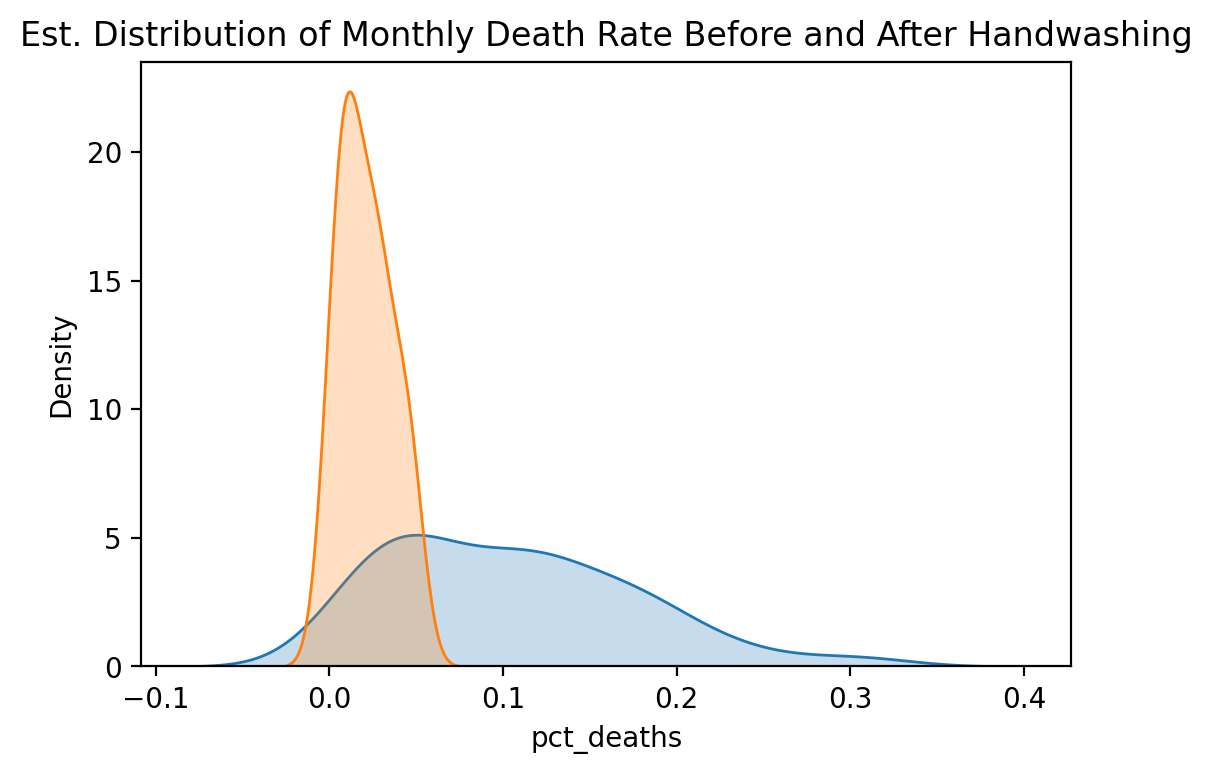

In [ ]:
plt.figure(dpi=200)
# By default the distribution estimate includes a negative death rate!
sns.kdeplot(before_handwash.pct_deaths, shade=True)
sns.kdeplot(after_handwash.pct_deaths, shade=True)
plt.title('Est. Distribution of Monthly Death Rate Before and After Handwashing')
plt.show()

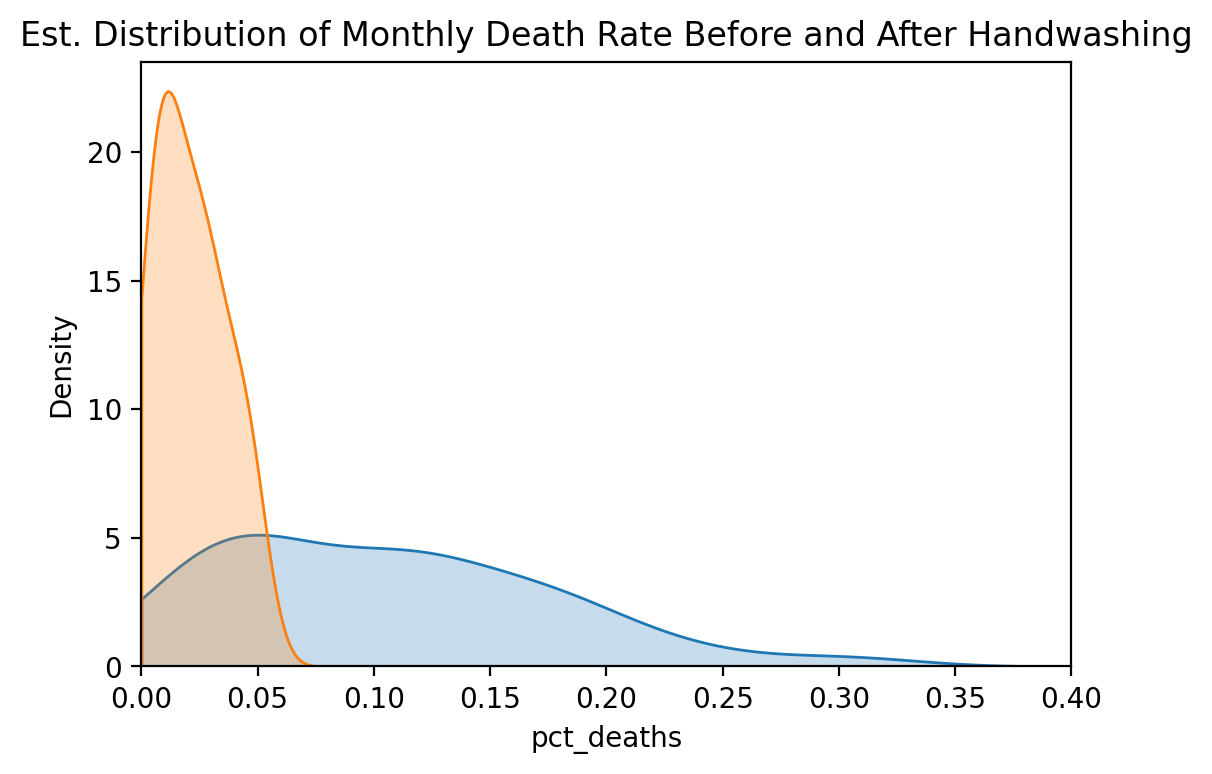

In [ ]:
plt.figure(dpi=200)
sns.kdeplot(before_handwash.pct_deaths, 
            shade=True,
            clip=(0,1))
sns.kdeplot(after_handwash.pct_deaths, 
            shade=True,
            clip=(0,1))
plt.title('Est. Distribution of Monthly Death Rate Before and After Handwashing')
plt.xlim(0, 0.40)
plt.show()


### Use a T-Test to Show Statistical Significance

 Use a t-test to determine if the differences in the means are statistically significant or purely due to chance. 

If the p-value is less than 1% then we can be 99% certain that handwashing has made a difference to the average monthly death rate. 





In [ ]:
t_stat, p_value = stats.ttest_ind(a=before_handwash.pct_deaths, 
                                  b=after_handwash.pct_deaths)
print(t_stat)
print(p_value)
print(f'p-palue is {p_value:.10f}')
print(f't-statstic is {t_stat:.4}')


5.511607211341916
2.985436556724523e-07
p-palue is 0.0000002985
t-statstic is 5.512
